# Intento 5

La diferencia entre este intento y el anterior
es que hemos reducido el batch_size
de 32 a 20 imágenes por lote.

## 0. Descarga del dataset

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

train_ds_path  ='../../deeplearning-az/datasets/Part 2 - Convolutional Neural Networks (CNN)/dataset/training_set'
test_ds_path   ='../../deeplearning-az/datasets/Part 2 - Convolutional Neural Networks (CNN)/dataset/test_set'
cat_or_dog_path='../../deeplearning-az/datasets/Part 2 - Convolutional Neural Networks (CNN)/dataset/single_prediction/cat_or_dog_1.jpg'

#train_ds_path  ='C:/Users/Usuario/Documents/Master/Aprendizaje Profundo/Udemy/deeplearning-az/datasets/Part 2 - Convolutional Neural Networks (CNN)/dataset/training_set'
#test_ds_path   ='C:/Users/Usuario/Documents/Master/Aprendizaje Profundo/Udemy/deeplearning-az/datasets/Part 2 - Convolutional Neural Networks (CNN)/dataset/test_set'
#cat_or_dog_path='C:/Users/Usuario/Documents/Master/Aprendizaje Profundo/Udemy/deeplearning-az/datasets/Part 2 - Convolutional Neural Networks (CNN)/dataset/single_prediction/cat_or_dog_1.jpg'

#train_ds_path  ='.\\data\\training_set'
#test_ds_path   ='.\\data\\test_set'
#cat_or_dog_path='.\\data\\single_prediction\\cat_or_dog_1.jpg'


Primero, importar las librerías y paquetes

In [2]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.layers import GlobalAveragePooling2D
from keras.layers import Dropout
# Nota, algunas capas no están importadas aquí y se importan directamente en el código con tf.keras.laters.[CAPA]

import matplotlib.pyplot as plt
import tensorflow as tf
import os
import numpy as np
import random as rn

Fijamos seeds para poder reproducir resultados (aunque aun así a veces no lo conseguimos, probablementa haya inicializaciones que no dependan de estas seeds)

In [3]:
os.environ['PYTHONHASHSEED'] = '0'
np.random.seed(42)
rn.seed(12345)
tf.random.set_seed(1234)

## 1. Construcción del modelo CNN añadiendo un tamaño de imagen mayor


El tamaño de imagen que emplearemos será de 96x96, y el dropout rate es del 50%

In [4]:
frame_size = (96, 96)
"""
esta dupla nos permitirá parametrizar la resolución
de entrada de las imágenes
"""

def crear_clasificador_intento5():
    classifier = Sequential()
    classifier.add(Conv2D(filters = 32,kernel_size = (3, 3), 
                      input_shape = (*frame_size, 3), activation = "relu"))
    classifier.add(MaxPooling2D(pool_size = (2,2)))
    classifier.add(Conv2D(filters = 32,kernel_size = (3, 3), activation = "relu"))
    classifier.add(MaxPooling2D(pool_size = (2,2)))
    classifier.add(Flatten())
    classifier.add(Dense(units = 128, activation = "relu"))
    classifier.add(Dropout(0.5))
    classifier.add(Dense(units = 1, activation = "sigmoid"))    
    return classifier

## 2. Entrenamiento del intento 5

En primer lugar instanciamos nuestro modelo y compilamos usando:
* Un optimizador Adam. La learning rate que emplea por defecto es 0.001
* Binary cross entropy como función de coste a minimizar.  

In [5]:
classifier = crear_clasificador_intento5()
classifier.compile(optimizer = "adam", 
                   loss = "binary_crossentropy", 
                   metrics = ["accuracy"])
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 94, 94, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 47, 47, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 45, 45, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 22, 22, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 15488)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               1982592   
_________________________________________________________________
dropout (Dropout)            (None, 128)               0

En segundo lugar, generamos los datasets de entrenamiento y test.
Emplearemos un **tamaño de batch de 20**

In [6]:
from keras.preprocessing.image import ImageDataGenerator

batch_size=20

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_dataset = train_datagen.flow_from_directory(train_ds_path,
                                                     target_size=frame_size,
                                                     batch_size=batch_size,
                                                     class_mode='binary')

testing_dataset = test_datagen.flow_from_directory(test_ds_path,
                                                   target_size=frame_size,                                                   
                                                   batch_size=batch_size,
                                                   class_mode='binary')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


Definimos el callback y realizamos el entrenamiento con las condiciones descritas en la sección de introducción.

In [7]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta = 0, patience=5),
]                                                   
                                                   
history1 = classifier.fit(x=training_dataset,
                         steps_per_epoch=8000/batch_size,
                         epochs=100,
                         validation_data=testing_dataset,
                         validation_steps=2000/batch_size,
                         workers=4) # "Si pedimos más de un proceso el rendimiento mejora un poco


Epoch 1/100
400/400 [==============================] - 65s 163ms/step - loss: 0.6891 - accuracy: 0.5504 - val_loss: 0.6769 - val_accuracy: 0.5725
Epoch 2/100
400/400 [==============================] - 66s 165ms/step - loss: 0.6621 - accuracy: 0.6101 - val_loss: 0.6686 - val_accuracy: 0.6155
Epoch 3/100
400/400 [==============================] - 69s 173ms/step - loss: 0.6286 - accuracy: 0.6530 - val_loss: 0.6107 - val_accuracy: 0.6815
Epoch 4/100
400/400 [==============================] - 68s 169ms/step - loss: 0.5944 - accuracy: 0.6865 - val_loss: 0.5768 - val_accuracy: 0.7135
Epoch 5/100
400/400 [==============================] - 66s 165ms/step - loss: 0.5739 - accuracy: 0.7014 - val_loss: 0.5922 - val_accuracy: 0.6945
Epoch 6/100
400/400 [==============================] - 65s 163ms/step - loss: 0.5565 - accuracy: 0.7147 - val_loss: 0.5656 - val_accuracy: 0.7270
Epoch 7/100
400/400 [==============================] - 66s 164ms/step - loss: 0.5310 - accuracy: 0.7361 - val_loss: 0.5642 -

Epoch 57/100
400/400 [==============================] - 66s 165ms/step - loss: 0.2287 - accuracy: 0.9065 - val_loss: 0.5475 - val_accuracy: 0.8060
Epoch 58/100
400/400 [==============================] - 69s 173ms/step - loss: 0.2260 - accuracy: 0.9076 - val_loss: 0.5976 - val_accuracy: 0.7885
Epoch 59/100
400/400 [==============================] - 68s 169ms/step - loss: 0.2221 - accuracy: 0.9069 - val_loss: 0.5555 - val_accuracy: 0.7940
Epoch 60/100
400/400 [==============================] - 63s 157ms/step - loss: 0.2264 - accuracy: 0.9064 - val_loss: 0.5553 - val_accuracy: 0.8035
Epoch 61/100
400/400 [==============================] - 62s 156ms/step - loss: 0.2195 - accuracy: 0.9104 - val_loss: 0.5952 - val_accuracy: 0.8105
Epoch 62/100
400/400 [==============================] - 62s 156ms/step - loss: 0.2202 - accuracy: 0.9115 - val_loss: 0.5896 - val_accuracy: 0.8030
Epoch 63/100
400/400 [==============================] - 62s 155ms/step - loss: 0.2020 - accuracy: 0.9166 - val_loss: 0

Ploteamos el resultado

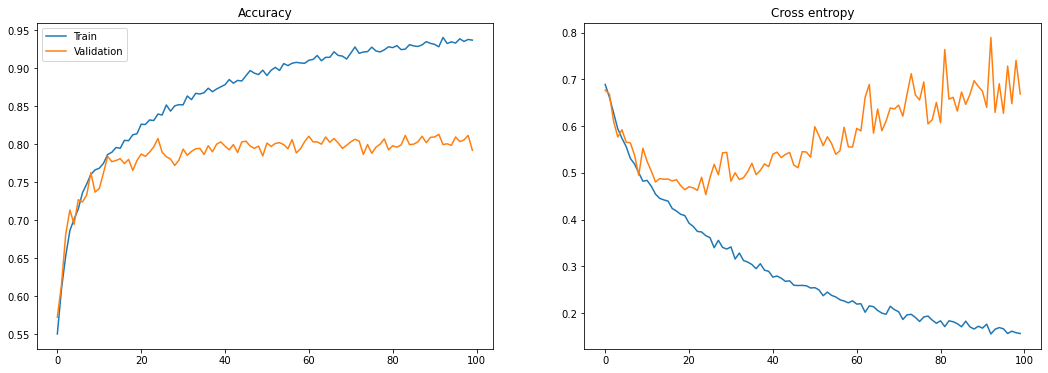

In [8]:
def plot_resultados_training(history):
    fig, axes = plt.subplots(1,2, figsize=(18,6))
    axes[0].plot(history.history['accuracy'], label='Train')
    axes[0].plot(history.history['val_accuracy'], label='Validation')
    axes[0].legend()
    axes[0].set_title('Accuracy')
    axes[1].plot(history.history['loss'], label='Train')
    axes[1].plot(history.history['val_loss'], label='Validation')
    axes[1].set_title('Cross entropy')

plot_resultados_training(history1)

In [9]:
classifier.save('./models/clasificador5')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: ./models/clasificador5/assets


## Comentario
La reducción del número de imágenes por lote no ha dado el resultado esperado. 
De hecho en esta ejecución ha arrojado precisiones un poco peores que en el anterior
y se sigue produciendo sobre-entrenamiento, que despunta a partir de la epoch 20. 


## Propuesta de mejora
Un número más rico de *features* a la salida de la convolución también puede favorecer que la red neuronal valore otros patrones de las imagenes que ayuden a evitar el sobre-entrenamiento.

Porponemos la creacion de una tercera capa de convolucion mas rica en filtros (actualmente trabajamos con 2)
y volver al tamaño de lote por defecto en keras (32).